In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
df = pd.read_csv('leads.csv')

In [3]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
df.shape

(9240, 37)

In [5]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#DATA CLEANING 

In [8]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
df= df.replace('slect', np.nan)

In [10]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
#dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [12]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

   ... What is your current occupation  \
0  ...                      unemployed   
1  ...                      unemployed   
2  ...                         student   
3  ...                      unemployed   
4  ...                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   
3                       better career prospects     no                no   
4                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   
2                 no        no                    no                      no   
3                 no        no                    no                      no   
4                 no        no                    no                      no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified  

[5 rows x 22 columns]

In [14]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
#we have to fill some null values 
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [16]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [17]:
df2['Country'].value_counts()

Country
india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [18]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [19]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [20]:
df2.drop('Prospect ID', axis = 1, inplace = True)

In [21]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [22]:
df3 = df2[df2.isnull().sum(axis=1) <1]
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

# EDA

# UNIVARIATE ANALYSIS

# CATEGORICAL VARIABLE

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

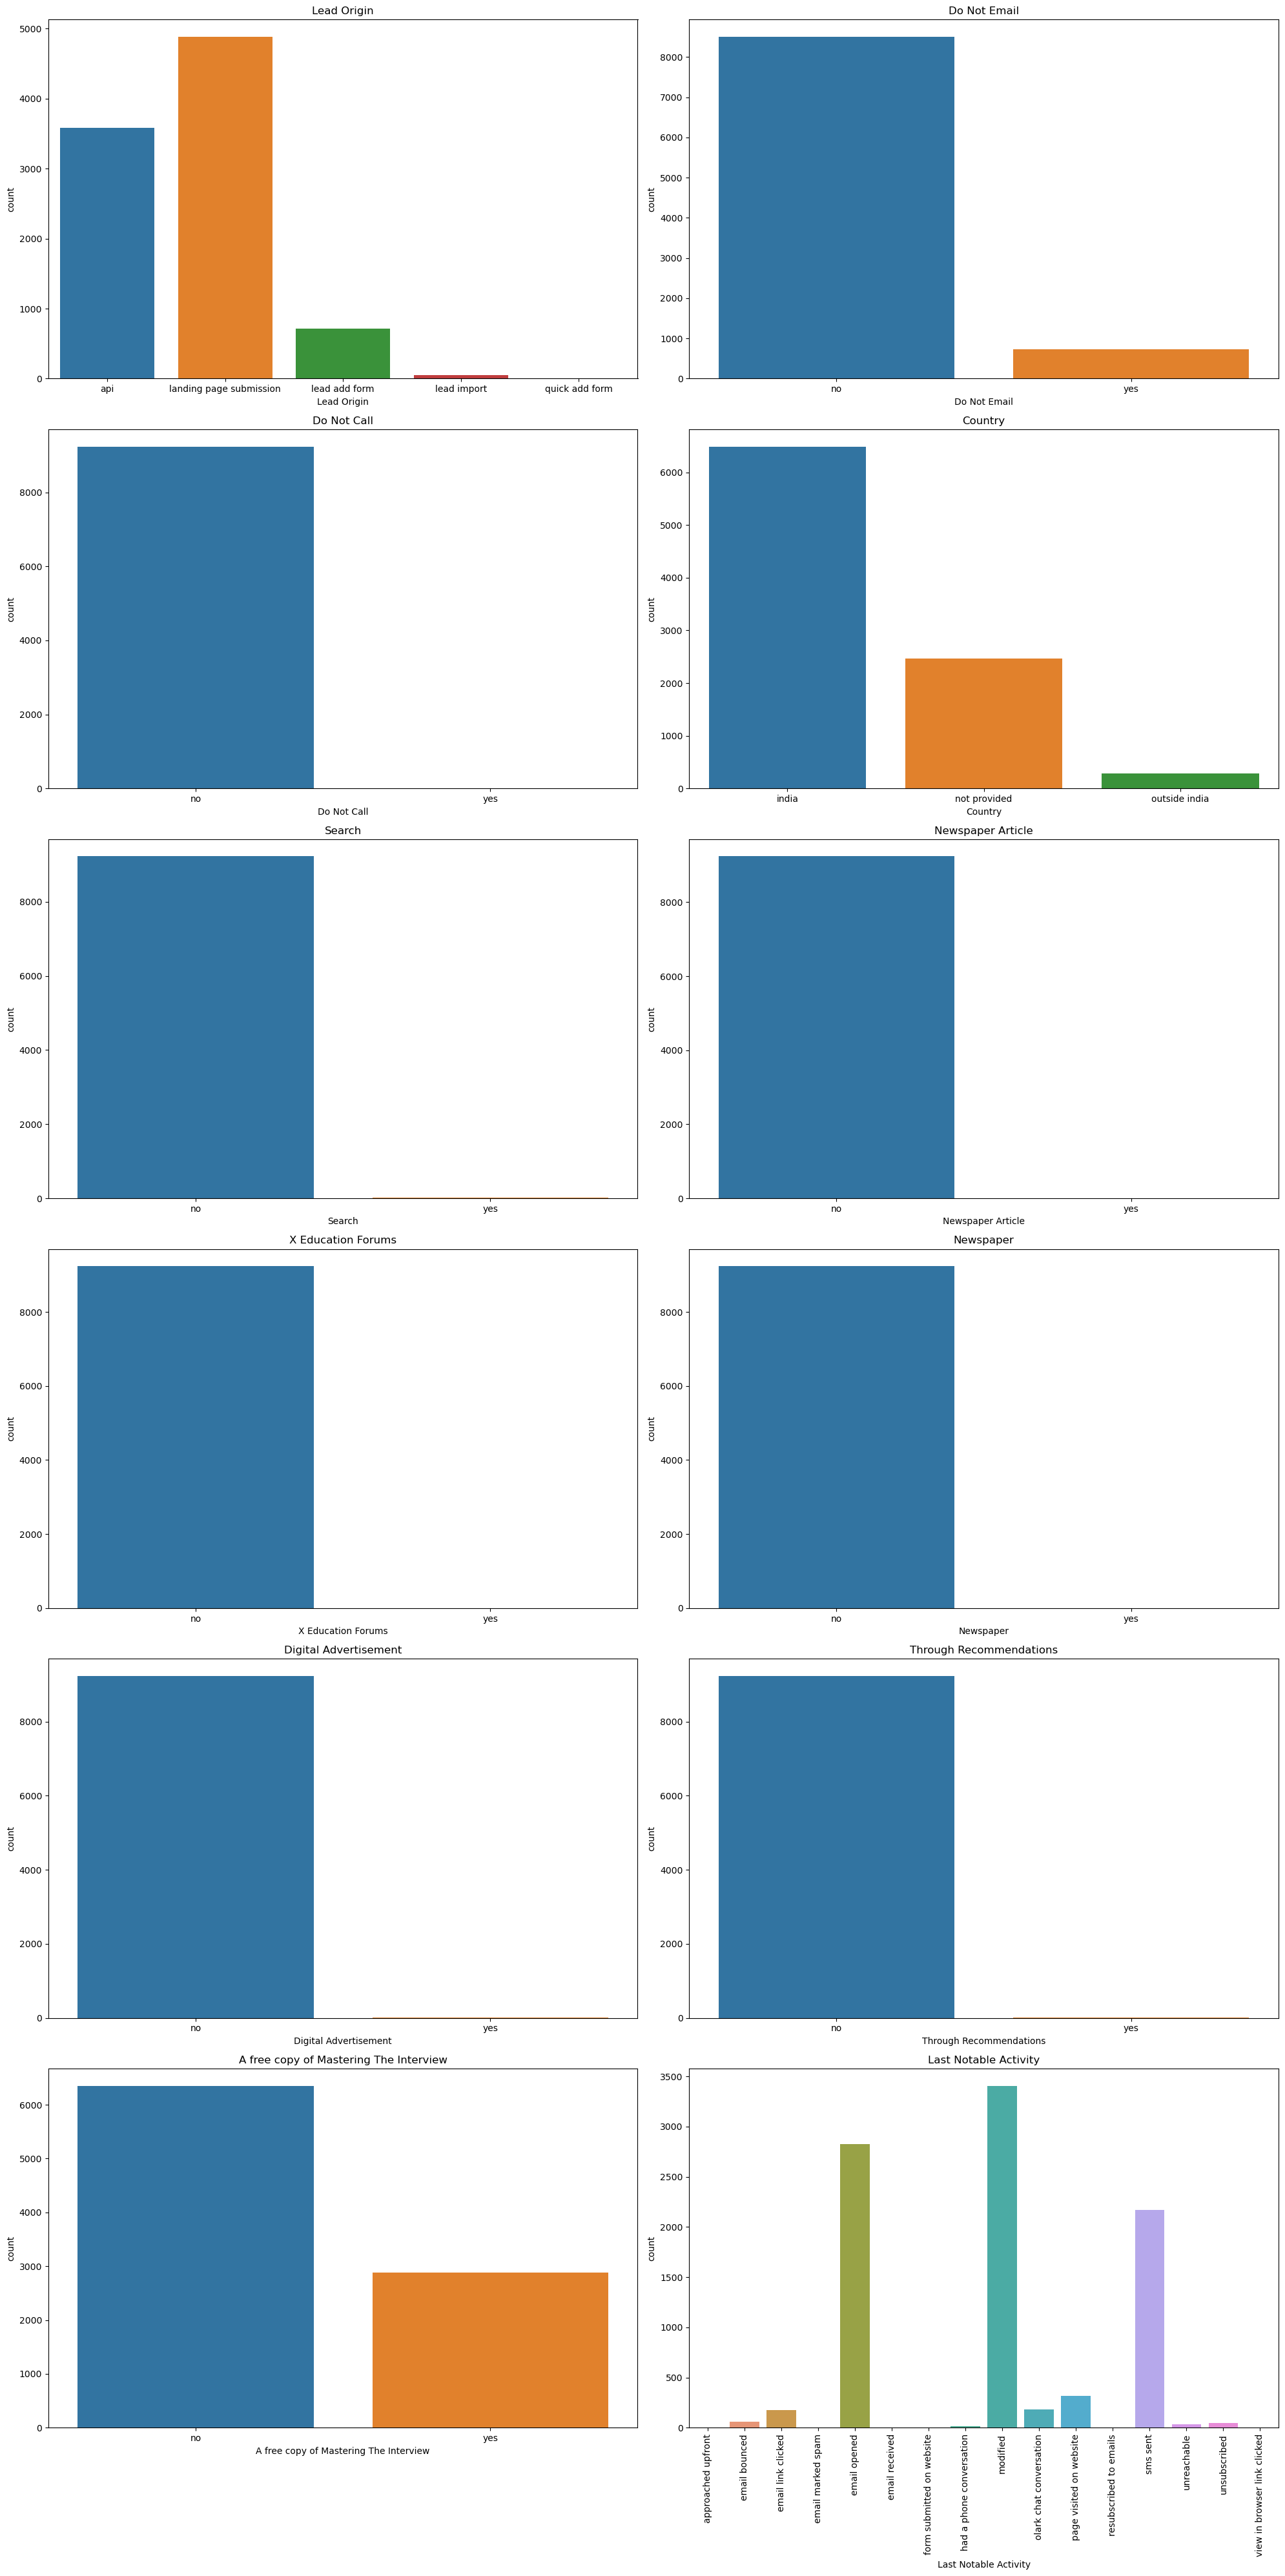

In [24]:
# List of columns to plot
columns = [
    'Lead Origin', 'Do Not Email', 'Do Not Call', 'Country', 'Search',
    'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
    'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity'
]

# Convert columns to categorical data types
for col in columns:
    df2[col] = df2[col].astype('category')

# Create a figure with a specified size
plt.figure(figsize=(20, 40))

# Loop through columns and create a subplot for each
for i, col in enumerate(columns, 1):
    plt.subplot(6, 2, i)
    sns.countplot(x=df2[col])
    plt.title(col)
    if col == 'Last Notable Activity':
        plt.xticks(rotation=90)

# Display the plots
plt.tight_layout()
plt.show()

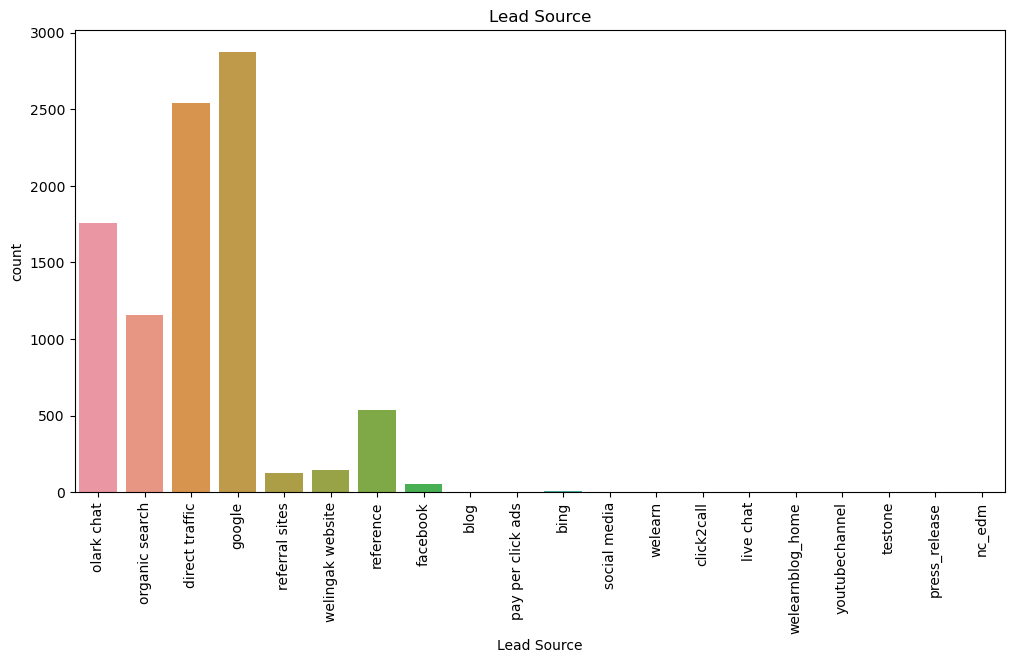

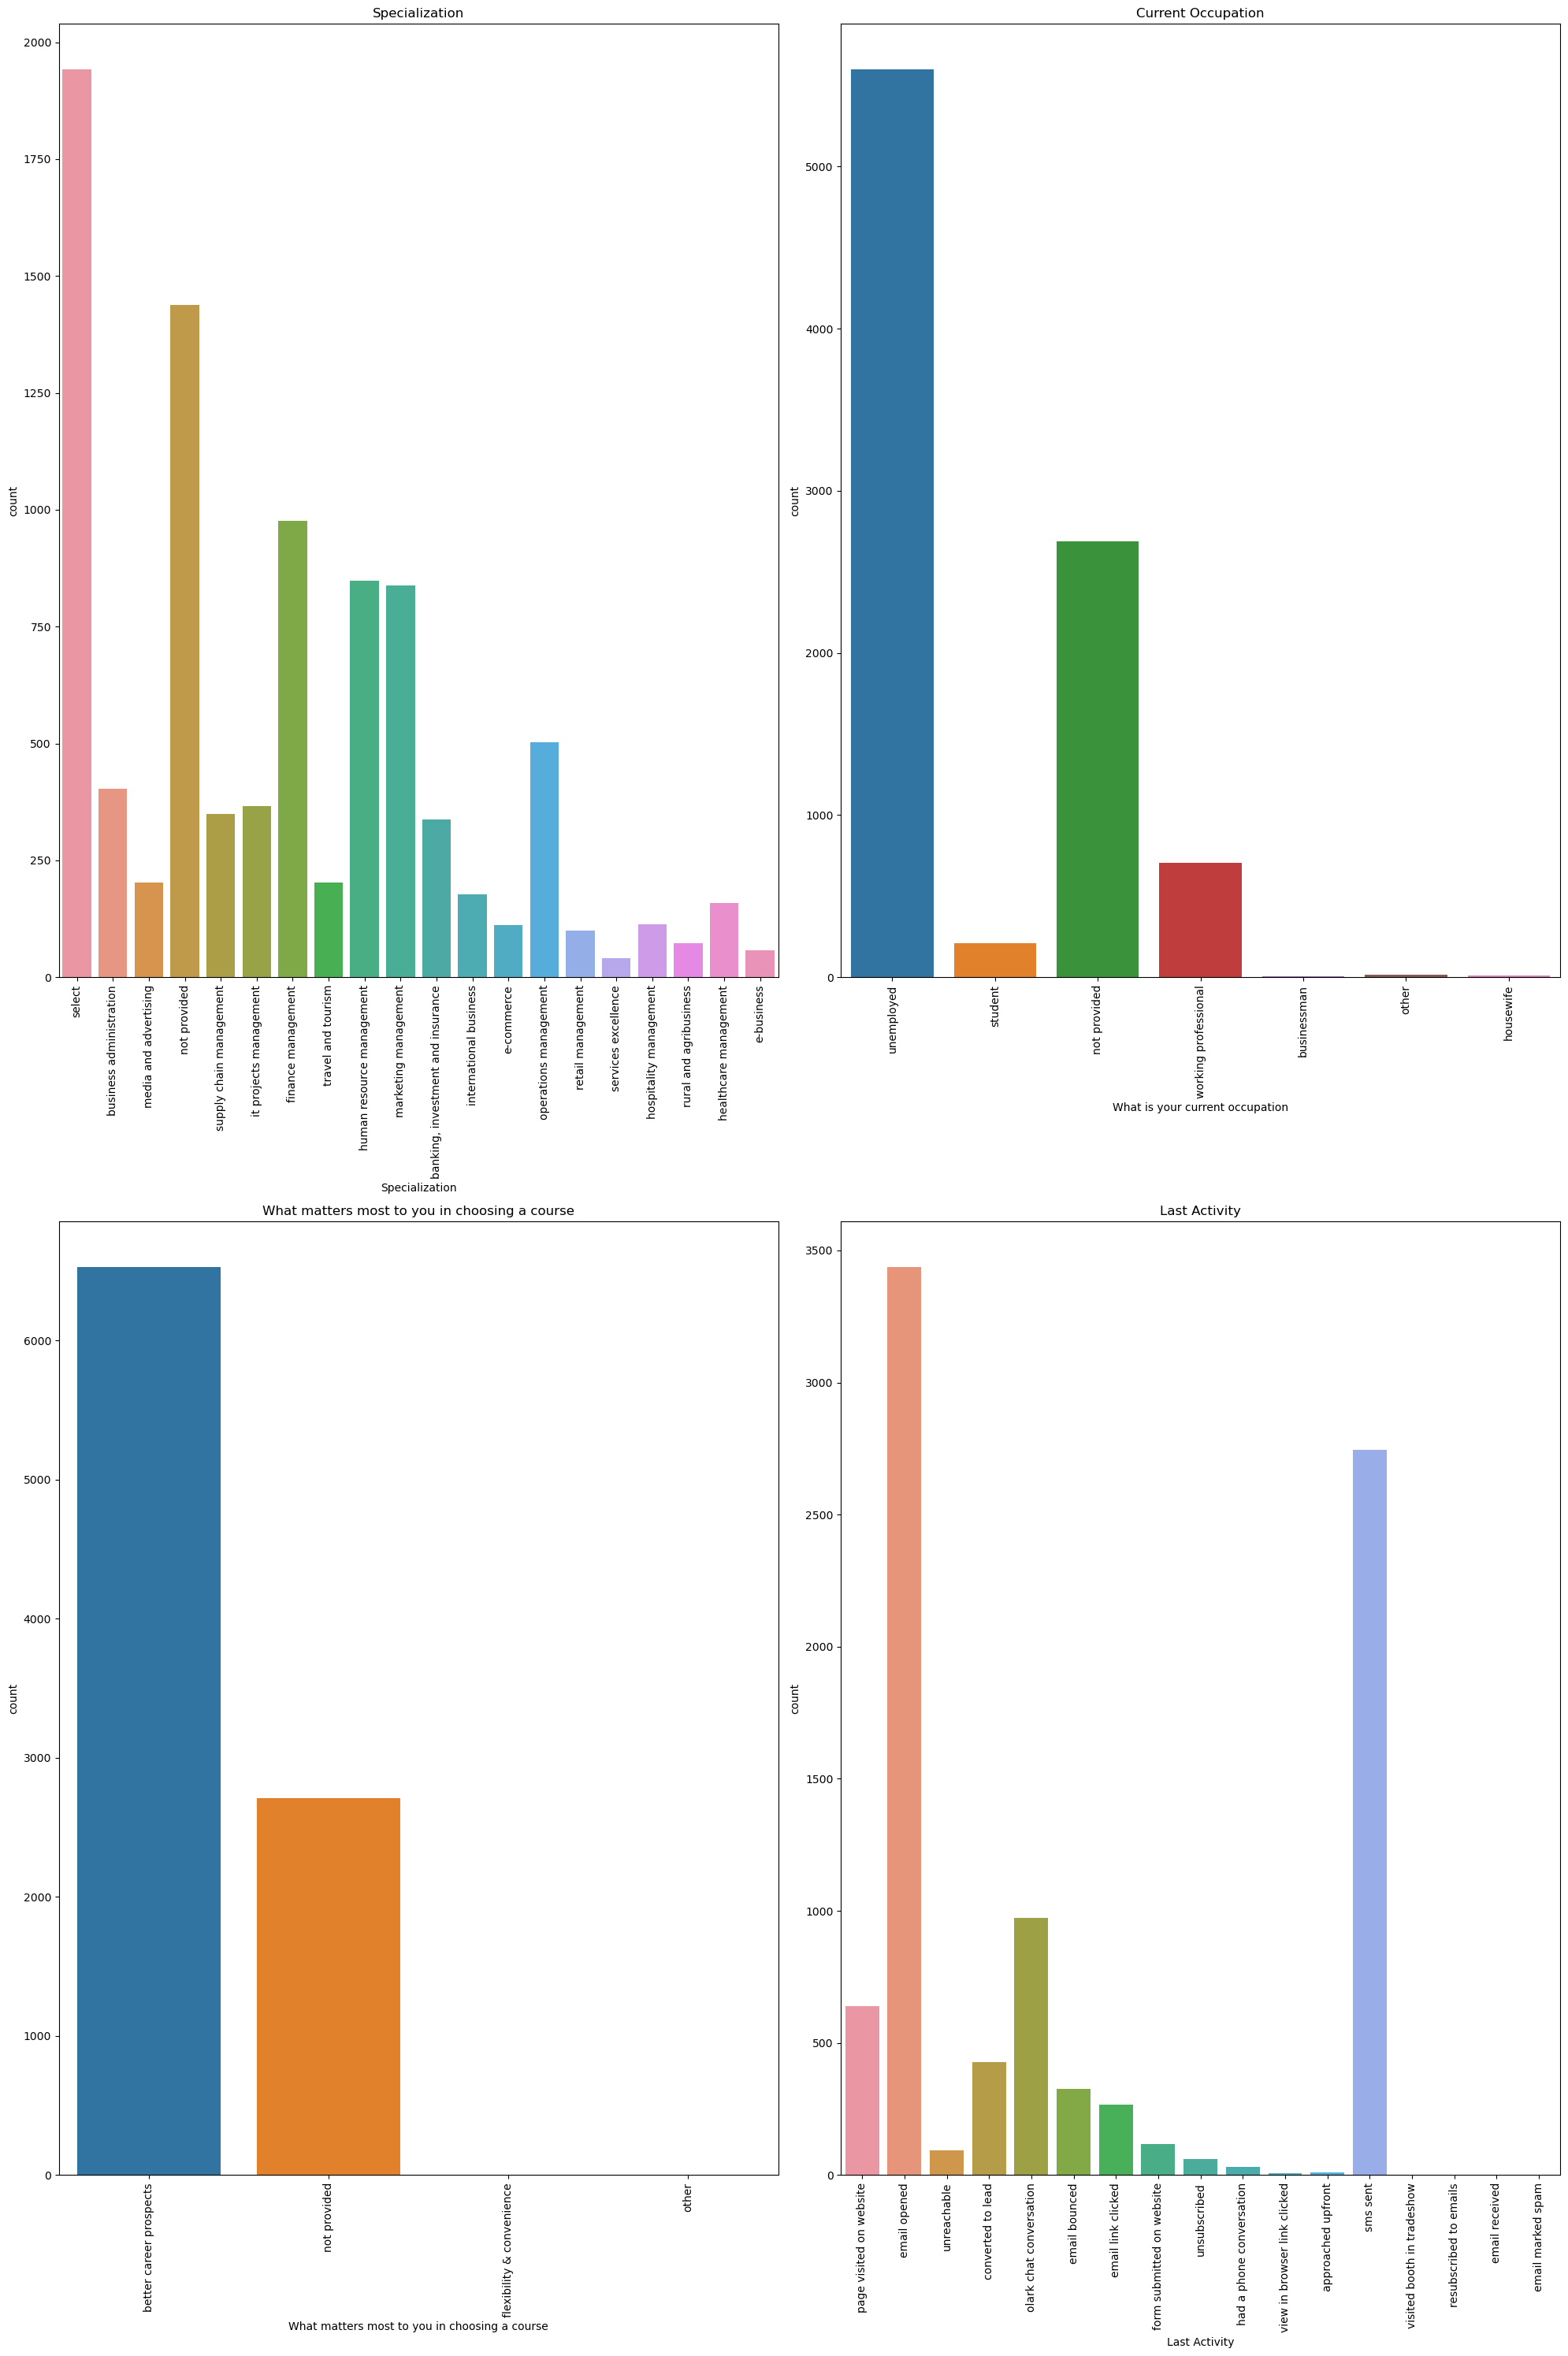

In [25]:
#List of columns to plot and their respective titles
columns = [
    ('Lead Source', 'Lead Source'),
    ('Specialization', 'Specialization'),
    ('What is your current occupation', 'Current Occupation'),
    ('What matters most to you in choosing a course', 'What matters most to you in choosing a course'),
    ('Last Activity', 'Last Activity',)
]

# Plot the first chart separately
plt.figure(figsize=(12, 6))
sns.countplot(x=df2['Lead Source']).tick_params(axis='x', rotation=90)
plt.title('Lead Source')
plt.show()

# Create a figure with a specified size for the remaining plots
plt.figure(figsize=(20, 30))

# Loop through columns and create a subplot for each
for i, (col, title) in enumerate(columns[1:], 1):  # Skip the first column since it's already plotted
    plt.subplot(2, 2, i)
    sns.countplot(x=df2[col]).tick_params(axis='x', rotation=90)
    plt.title(title)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


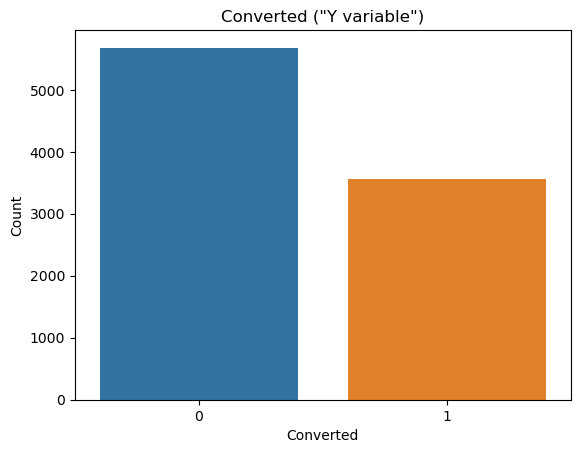

In [26]:
sns.countplot(x=df['Converted'])
plt.title('Converted ("Y variable")')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

# NUMERICAL VARIABLES

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9204 non-null   object  
 2   Do Not Email                                   9240 non-null   category
 3   Do Not Call                                    9240 non-null   category
 4   Converted                                      9240 non-null   int64   
 5   TotalVisits                                    9103 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9103 non-null   float64 
 8   Last Activity                                  9137 non-null   object  
 9   Country                                  

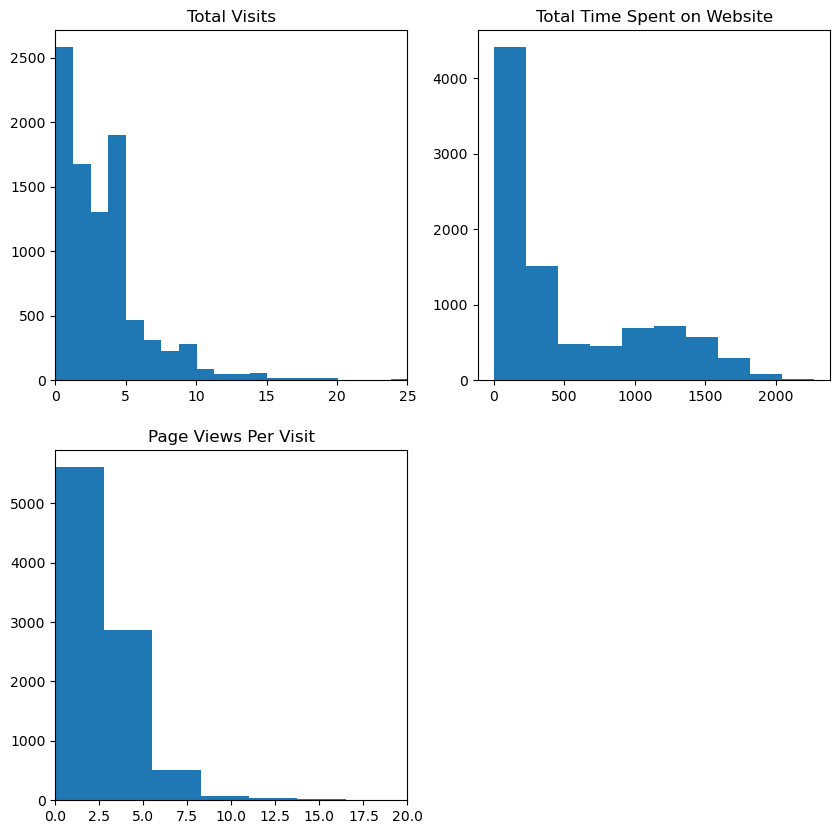

In [28]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df2['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df2['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

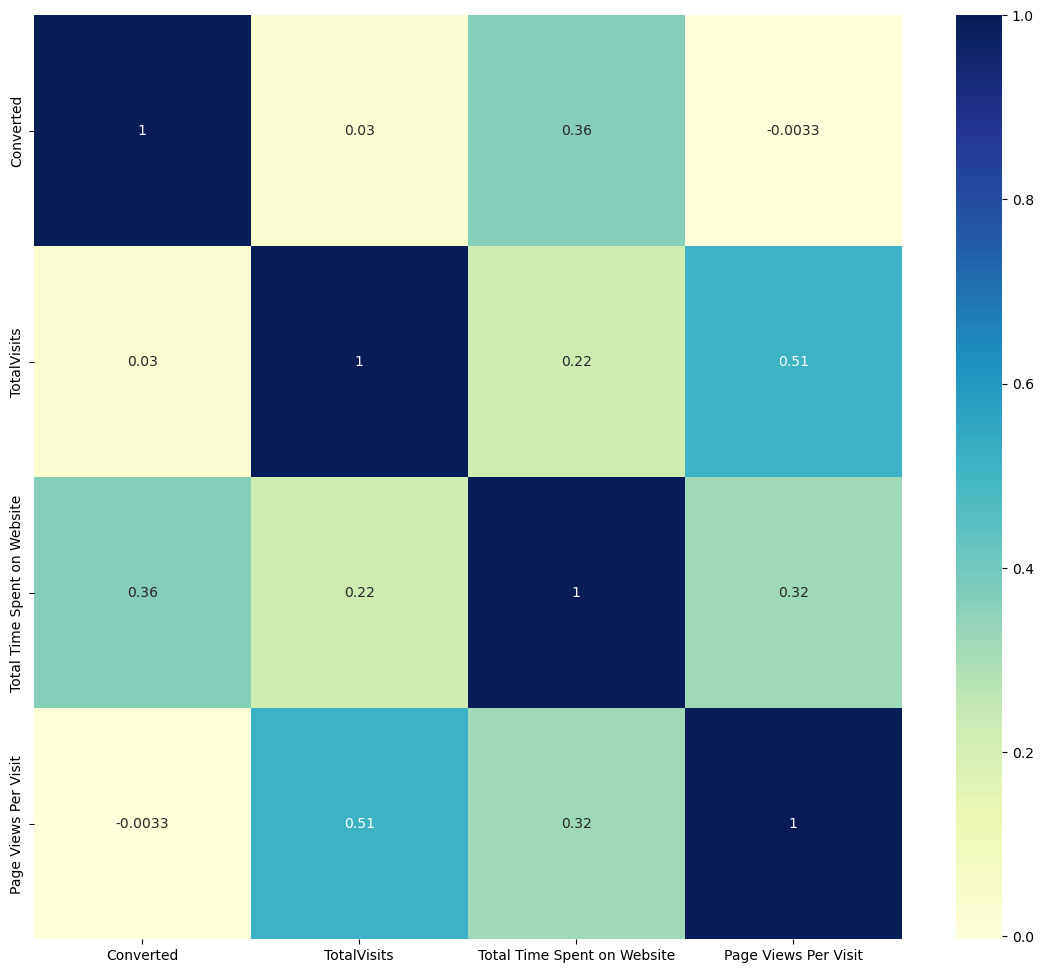

In [29]:
plt.figure(figsize = (14,12))
sns.heatmap(df[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

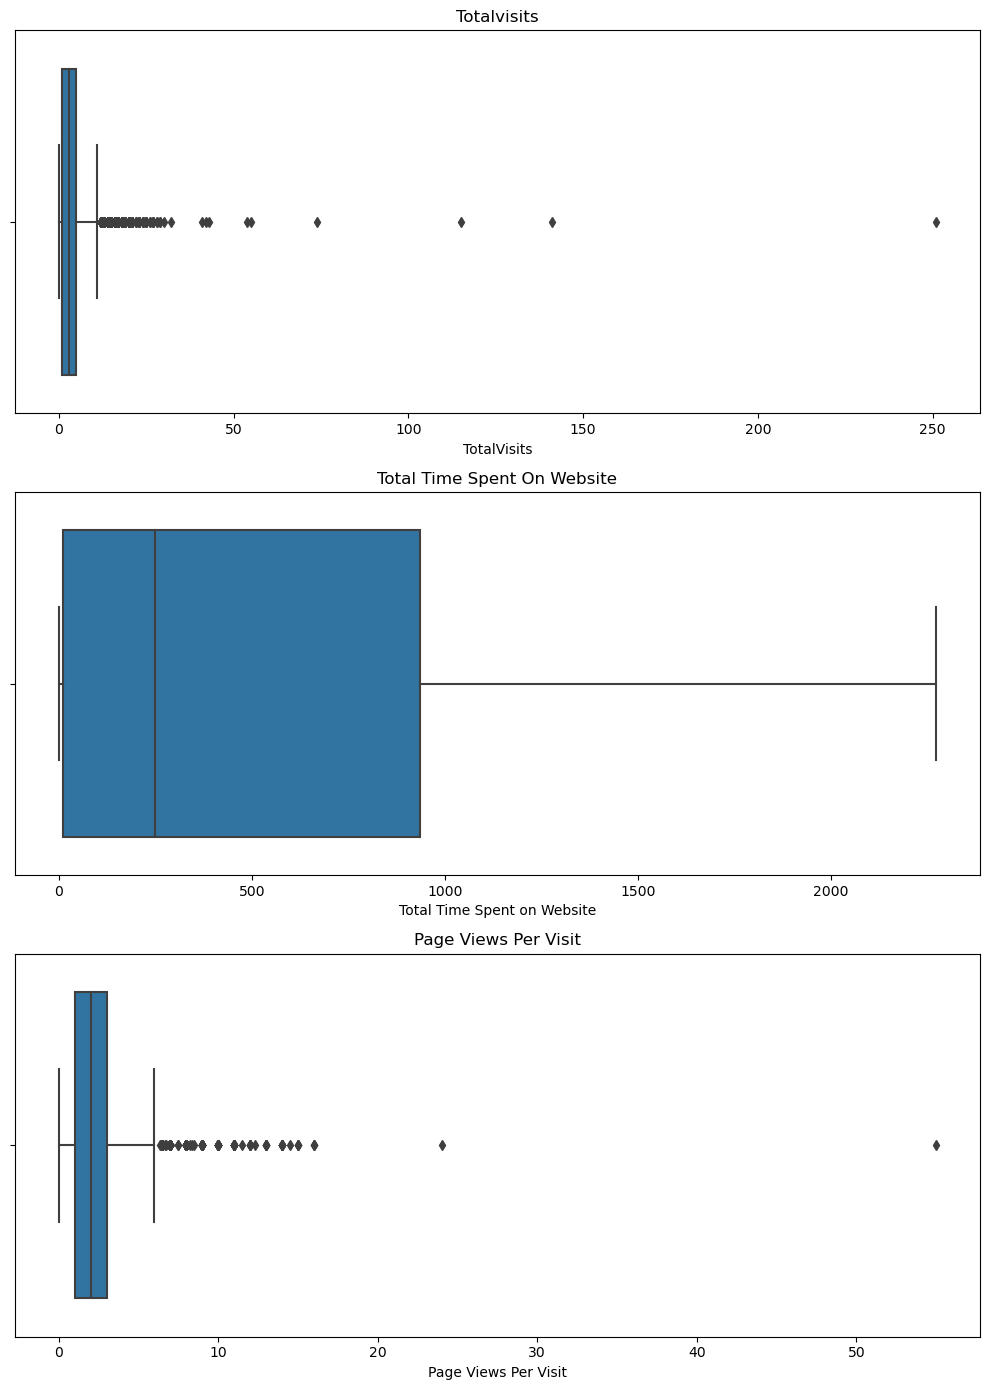

In [30]:
# List of columns to plot
columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Create a figure with a specified size
plt.figure(figsize=(10, 14))

# Loop through columns and create a subplot for each
for i, col in enumerate(columns, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x=df[col])
    plt.title(col.replace('_', ' ').title())

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Observations

Looking at both the box plots and the statistics, there are upper bound outliers in both `totalVisits` and `page_views_per_visit` columns. We can also see that the data can be capped at 99 percentile.

It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

In [31]:
numeric = df2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9103.000000                  9240.000000           9103.000000
mean      3.445238                   487.698268              2.362820
std       4.854853                   548.021466              2.161418
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

# Dummy Variables

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9204 non-null   object  
 2   Do Not Email                                   9240 non-null   category
 3   Do Not Call                                    9240 non-null   category
 4   Converted                                      9240 non-null   int64   
 5   TotalVisits                                    9103 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9103 non-null   float64 
 8   Last Activity                                  9137 non-null   object  
 9   Country                                  

# Creating dummy variables

In [33]:
df2.loc[:, df2.dtypes== 'object'].columns

Index(['Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')

In [34]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df2[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df2_dummy = pd.concat([df2, dummy], axis=1)
df2_dummy

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         api      olark chat           no          no   
1                         api  organic search           no          no   
2     landing page submission  direct traffic           no          no   
3     landing page submission  direct traffic           no          no   
4     landing page submission          google           no          no   
...                       ...             ...          ...         ...   
9235  landing page submission  direct traffic          yes          no   
9236  landing page submission  direct traffic           no          no   
9237  landing page submission  direct traffic          yes          no   
9238  landing page submission          google           no          no   
9239  landing page submission  direct traffic           no          no   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity        Country  ...  \
0                     0.00  page visited on website   not provided  ...   
1                     2.50             email opened          india  ...   
2                     2.00             email opened          india  ...   
3                     1.00              unreachable          india  ...   
4                     1.00        converted to lead          india  ...   
...                    ...                      ...            ...  ...   
9235                  2.67        email marked spam  outside india  ...   
9236                  2.00                 sms sent          india  ...   
9237                  2.00                 sms sent          india  ...   
9238                  3.00                 sms sent          india  ...   
9239                  3.00                 sms sent  outside india  ...   

     Last Notable Activity_form submitted on website  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
9235                                           False   
9236                                           False   
9237                                           False   
9238                                           False   
9239                                           False   

     Last Notable Activity_had a phone conversation  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   
...                                             ...   
9235                                          False   
9236                                          False   
9237                                          False   
9238                                          False   
9239                                          False   

     Last Notable Activity_modified  \
0                              True   
1                             False   
2                             False   
3    

In [35]:
columns_to_drop = [
    'What is your current occupation', 'Lead Origin', 'Lead Source', 
    'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 
    'Specialization_not provided', 'What matters most to you in choosing a course', 
    'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
    'Digital Advertisement', 'Through Recommendations', 
    'A free copy of Mastering The Interview', 'Last Notable Activity'
]

# Ensure all columns to be dropped exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df2_dummy.columns]

# Drop the columns
df2_dummy = df2_dummy.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df2_dummy)


      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_landing page submission  \
0                     0.00                                False   
1                     2.50                                False   
2                     2.00                                 True   

TEST-TRAIN SPLIT

In [36]:
X = df2_dummy.drop(['Converted'],axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_lead import  Lead Origin_quick add form  \
0                    False                       False   
1                    False                       False   
2                    False                       False   
3                    False                       False   
4                    False                       False   

   Specialization_business administration  Specialization_e-business  \
0                                   False                      False   
1                                   False                      False   
2                                    True                      False   
3                                   False                      False   
4                                   False                      False   

   Specialization_e-commerce  ...  \
0                      False  ...   
1                      False  ...   
2                      False  ...   
3                      False  ...   
4                      False  ...   

   Last Notable Activity_form submitted on website  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Last Notable Activity_had a phone conversation  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Last Notable Activity_modified  \
0                            True   
1                           False   
2                           False   
3                            True   
4                            True   

   Last Notable Activity_olark chat conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_page visited on website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_resubscribed to emails  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
0                           False                              False   
1                           False                              False   
2                           False                              False   
3                           False                              False   
4       

In [37]:
y = df2_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [38]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [39]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3112     0.007968                     0.182867              0.083333   
8413     0.019920                     0.679538              0.208333   
2961     0.011952                     0.553928              0.041667   
24       0.023904                     0.504660              0.062500   
2740     0.011952                     0.445184              0.125000   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
3112                                 True                      False   
8413                                 True                      False   
2961                                False                       True   
24                                  False                      False   
2740                                 True                      False   

      Lead Origin_lead import  Lead Origin_quick add form  \
3112                    False                       False   
8413                    False                       False   
2961                    False                       False   
24                      False                       False   
2740                    False                       False   

      Specialization_business administration  Specialization_e-business  \
3112                                   False                      False   
8413                                   False                      False   
2961                                   False                      False   
24                                     False                      False   
2740                                   False                      False   

      Specialization_e-commerce  ...  \
3112                       True  ...   
8413                      False  ...   
2961                      False  ...   
24                        False  ...   
2740                      False  ...   

      Last Notable Activity_form submitted on website  \
3112                                            False   
8413                                            False   
2961                                            False   
24                                              False   
2740                                            False   

      Last Notable Activity_had a phone conversation  \
3112                                           False   
8413                                           False   
2961                                           False   
24                                             False   
2740                                           False   

      Last Notable Activity_modified  \
3112                           False   
8413                           False   
2961                           False   
24                             False   
2740                           False   

      Last Notable Activity_olark chat conversation  \
3112                                          False   
8413                                          False   
2961                                          False   
24                                            False   
2740                                          False   

      Last Notable Activity_page visited on website  \
3112                                          False   
8413                                          False   
2961                                          False   
24                                            False   
2740                                          False   

      Last Notable Activity_resubscribed to emails  \
3112                                         False   
8413                                         False   
2961                                         False   
24                                           False   
2740                                         False   

      Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
3112                           False                              False   
8413                   

In [40]:
# checking the conversion rate
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

38.53896103896104

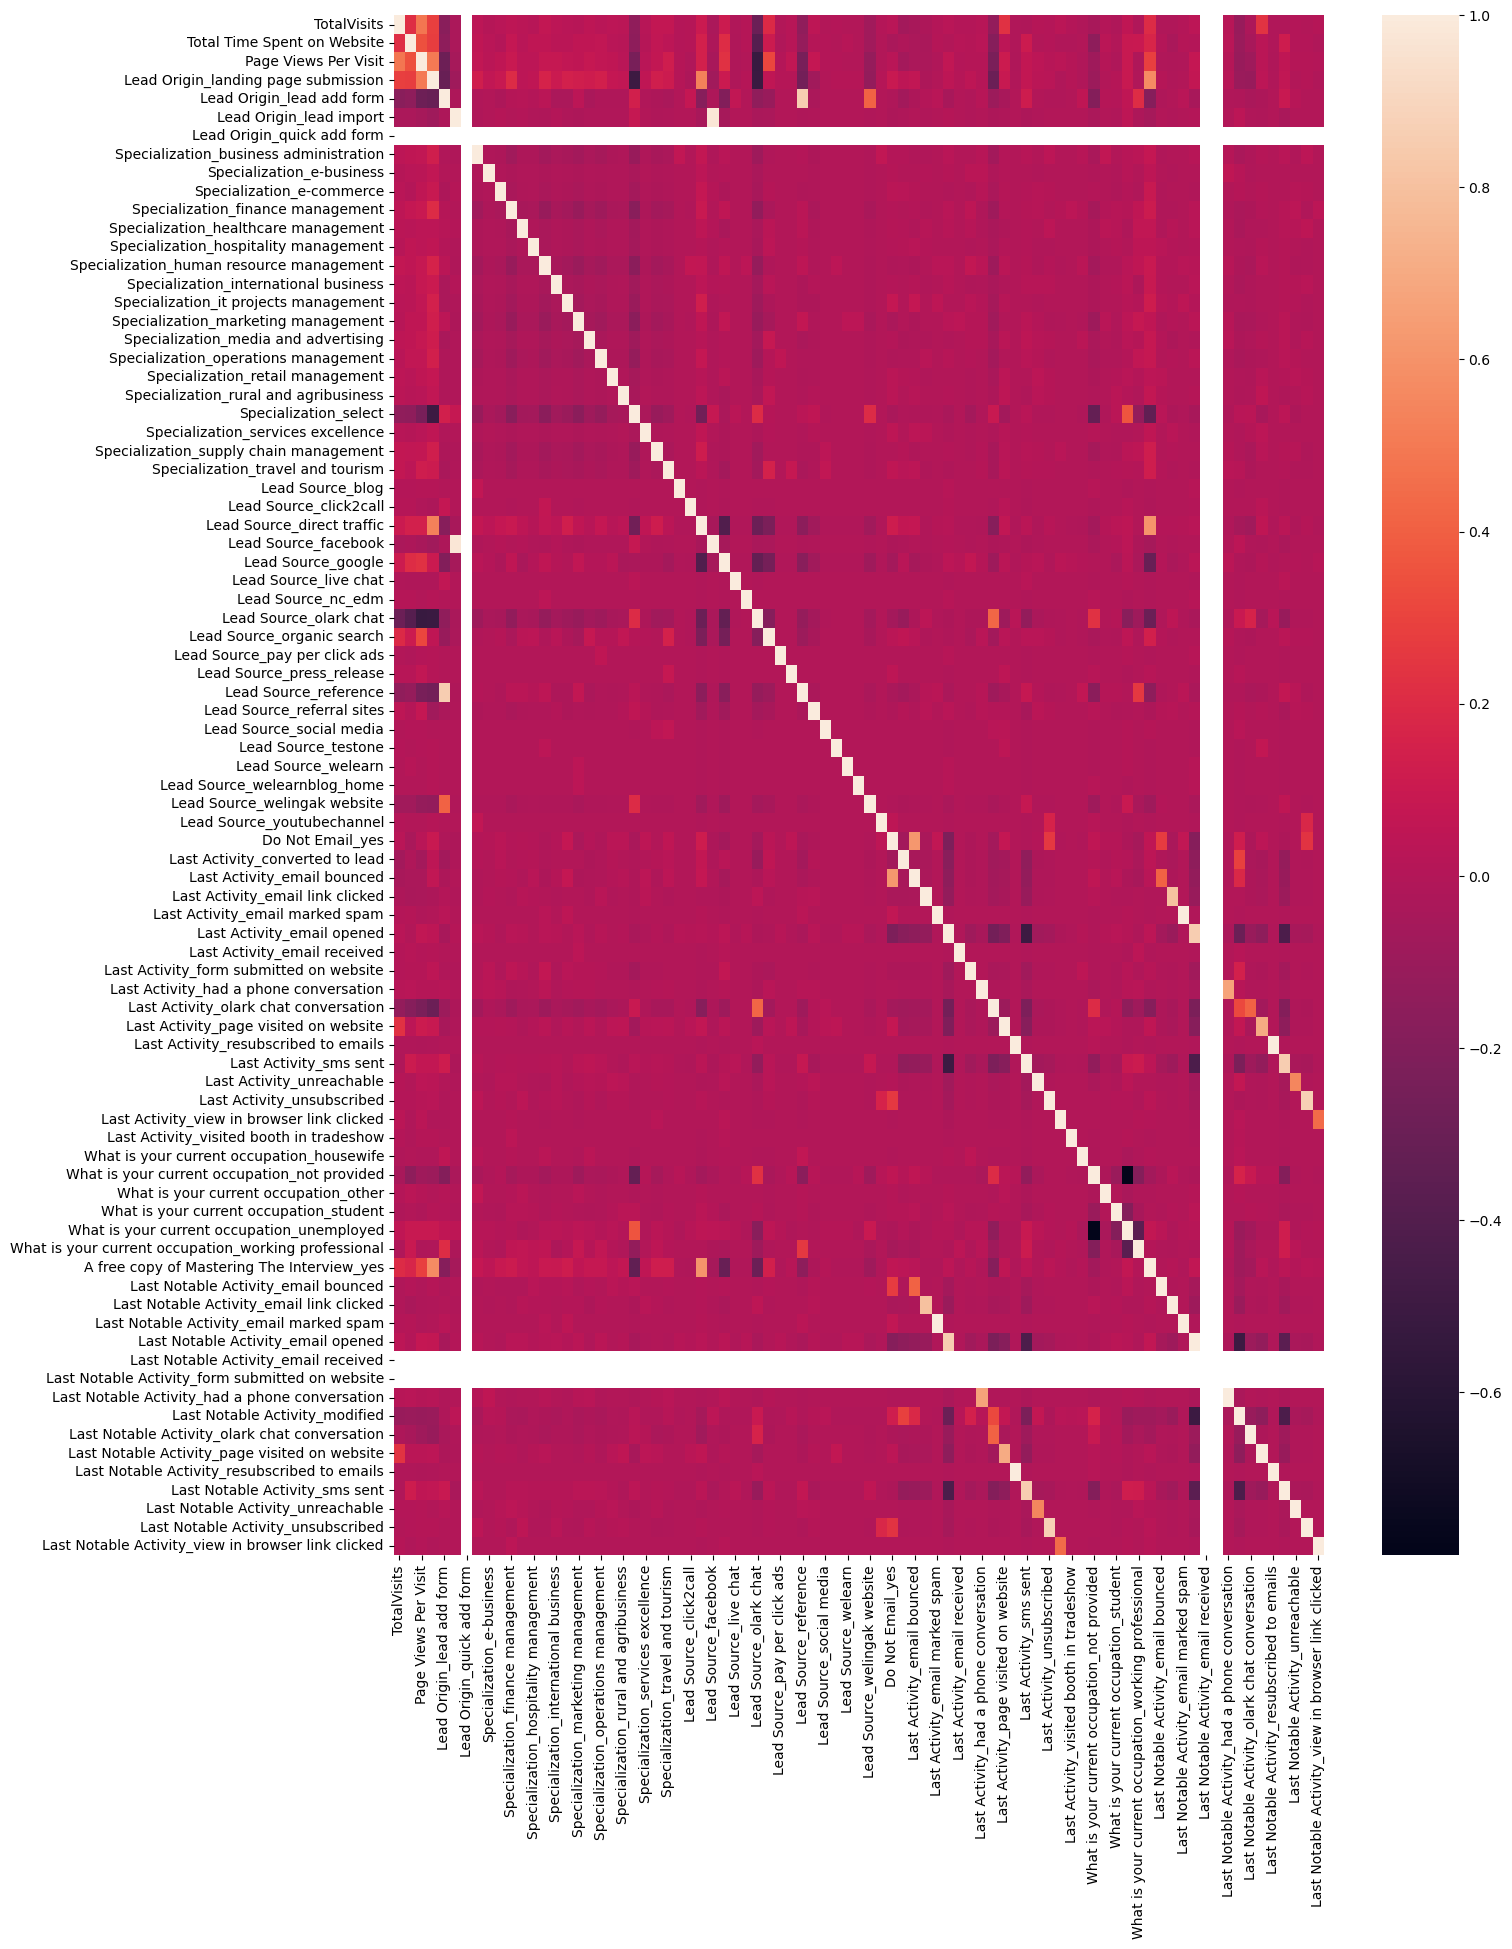

In [41]:
# To check the correlation among varibles
plt.figure(figsize=(15,20))
sns.heatmap(X_train.corr())
plt.show()

# MODEL BUILDING

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create the logistic regression model
logreg = LogisticRegression()

# Create the RFE object with logistic regression and 13 features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Create the pipeline with an imputer
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('rfe', rfe),
    ('logreg', logreg)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Optionally, make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 60),
 ('Total Time Spent on Website', False, 63),
 ('Page Views Per Visit', False, 59),
 ('Lead Origin_landing page submission', False, 9),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 28),
 ('Lead Origin_quick add form', False, 67),
 ('Specialization_business administration', False, 37),
 ('Specialization_e-business', False, 35),
 ('Specialization_e-commerce', False, 40),
 ('Specialization_finance management', False, 36),
 ('Specialization_healthcare management', False, 27),
 ('Specialization_hospitality management', False, 47),
 ('Specialization_human resource management', False, 33),
 ('Specialization_international business', False, 41),
 ('Specialization_it projects management', False, 38),
 ('Specialization_marketing management', False, 32),
 ('Specialization_media and advertising', False, 46),
 ('Specialization_operations management', False, 31),
 ('Specialization_retail management', False, 62),
 ('Specialization_rural and a

In [46]:
col = X_train.columns[rfe.support_]
X_train.columns[rfe.support_]

Index(['Lead Origin_lead add form', 'Lead Source_nc_edm',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_converted to lead', 'Last Activity_email marked spam',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_not provided',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_email marked spam',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [47]:
X_train = X_train[col]

In [48]:
# Importing statsmodels
import statsmodels.api as sm

In [49]:
boolean_columns = X_train.select_dtypes(include=['bool']).columns
X_train[boolean_columns] = X_train[boolean_columns].astype(int)

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3513.5
Date:                Mon, 01 Jul 2024   Deviance:                       7027.0
Time:                        15:45:35   Pearson chi2:                 7.79e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3181
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9663      0.567      1.703      0.089      -0.146       2.078
Lead Origin_lead add form                                2.4140      0.177     13.604      0.000       2.066       2.762
Lead Source_nc_edm                                      23.5026   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_welingak website                             2.6136      1.023      2.556      0.011       0.609       4.618
Do Not Email_yes                                        -1.5896      0.143    -11.135      0.000      -1.869      -1.310
Last Activity_converted to lead                         -1.1719      0.177     -6.610      0.000      -1.519      -0.824
Last Activity_email marked spam                         11.5117   9251.267      0.001      0.999   -1.81e+04    1.81e+04
Last Activity_olark chat conversation                   -1.1939      0.140     -8.557      0.000      -1.467      -0.920
Last Activity_sms sent                                   1.2856      0.064     20.212      0.000       1.161       1.410
What is your current occupation_not provided            -2.9028      0.571     -5.082      0.000      -4.022      -1.783
What is your current occupation_student                 -1.6292      0.595     -2.739      0.006      -2.795      -0.463
What is your current occupation_unemployed              -1.6631      0.568     -2.926      0.003      -2.777      -0.549
What is your current occupation_working professional     0.9165      0.589      1.556      0.120      -0.238       2.071
Last Notable Activity_email marked spam                 11.5117   9251.267      0.001      0.999   -1.81e+04    1.81e+04
Last Notable Activity_had a phone conversation           3.0978      1.066      2.905      0.004       1.008       5.188
Last Notable Activity_unreachable                        2.2310      0.632      3.533      0.000       0.993       3.469
========================================================================================================================
"""

In [50]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                     Last Activity_email marked spam   inf
12            Last Notable Activity_email marked spam   inf
10         What is your current occupation_unemployed  1.64
7                              Last Activity_sms sent  1.58
0                           Lead Origin_lead add form  1.44
8        What is your current occupation_not provided  1.34
2                        Lead Source_welingak website  1.27
6               Last Activity_olark chat conversation  1.24
11  What is your current occupation_working profes...  1.20
3                                    Do Not Email_yes  1.11
4                     Last Activity_converted to lead  1.10
9             What is your current occupation_student  1.02
14                  Last Notable Activity_unreachable  1.01
1                                  Lead Source_nc_edm  1.00
13     Last Notable Activity_had a phone conversation  1.00


The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'

In [52]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [53]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3521.6
Date:                Mon, 01 Jul 2024   Deviance:                       7043.1
Time:                        15:45:35   Pearson chi2:                 7.79e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3167
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9685      0.568      1.707      0.088      -0.144       2.081
Lead Origin_lead add form                                2.4068      0.177     13.565      0.000       2.059       2.755
Lead Source_nc_edm                                      23.4951   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_welingak website                             2.6140      1.023      2.556      0.011       0.610       4.618
Do Not Email_yes                                        -1.5941      0.143    -11.173      0.000      -1.874      -1.315
Last Activity_converted to lead                         -1.1818      0.177     -6.666      0.000      -1.529      -0.834
Last Activity_email marked spam                         11.5097   9257.496      0.001      0.999   -1.81e+04    1.82e+04
Last Activity_olark chat conversation                   -1.2030      0.139     -8.624      0.000      -1.476      -0.930
Last Activity_sms sent                                   1.2763      0.064     20.091      0.000       1.152       1.401
What is your current occupation_not provided            -2.8975      0.571     -5.071      0.000      -4.017      -1.778
What is your current occupation_student                 -1.6279      0.595     -2.736      0.006      -2.794      -0.462
What is your current occupation_unemployed              -1.6549      0.569     -2.911      0.004      -2.769      -0.541
What is your current occupation_working professional     0.9243      0.589      1.569      0.117      -0.230       2.079
Last Notable Activity_email marked spam                 11.5097   9257.496      0.001      0.999   -1.81e+04    1.82e+04
Last Notable Activity_unreachable                        2.2221      0.632      3.518      0.000       0.984       3.460
========================================================================================================================
"""

In [54]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                     Last Activity_email marked spam   inf
12            Last Notable Activity_email marked spam   inf
10         What is your current occupation_unemployed  1.64
7                              Last Activity_sms sent  1.58
0                           Lead Origin_lead add form  1.44
8        What is your current occupation_not provided  1.33
2                        Lead Source_welingak website  1.27
6               Last Activity_olark chat conversation  1.24
11  What is your current occupation_working profes...  1.20
3                                    Do Not Email_yes  1.11
4                     Last Activity_converted to lead  1.10
9             What is your current occupation_student  1.02
13                  Last Notable Activity_unreachable  1.01
1                                  Lead Source_nc_edm  1.00

In [55]:
X_train.drop('Lead Source_nc_edm', axis = 1, inplace = True)

In [56]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3523.6
Date:                Mon, 01 Jul 2024   Deviance:                       7047.3
Time:                        15:45:39   Pearson chi2:                 7.79e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3163
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9689      0.568      1.707      0.088      -0.144       2.081
Lead Origin_lead add form                                2.4065      0.177     13.564      0.000       2.059       2.754
Lead Source_welingak website                             2.6141      1.023      2.556      0.011       0.610       4.619
Do Not Email_yes                                        -1.5946      0.143    -11.179      0.000      -1.874      -1.315
Last Activity_converted to lead                         -1.1830      0.177     -6.673      0.000      -1.530      -0.836
Last Activity_email marked spam                         11.5096   9257.590      0.001      0.999   -1.81e+04    1.82e+04
Last Activity_olark chat conversation                   -1.2048      0.139     -8.638      0.000      -1.478      -0.931
Last Activity_sms sent                                   1.2748      0.064     20.074      0.000       1.150       1.399
What is your current occupation_not provided            -2.8934      0.571     -5.064      0.000      -4.013      -1.773
What is your current occupation_student                 -1.6278      0.595     -2.736      0.006      -2.794      -0.462
What is your current occupation_unemployed              -1.6546      0.569     -2.910      0.004      -2.769      -0.540
What is your current occupation_working professional     0.9245      0.589      1.569      0.117      -0.230       2.079
Last Notable Activity_email marked spam                 11.5096   9257.590      0.001      0.999   -1.81e+04    1.82e+04
Last Notable Activity_unreachable                        2.2201      0.632      3.516      0.000       0.982       3.458
========================================================================================================================
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                     Last Activity_email marked spam   inf
11            Last Notable Activity_email marked spam   inf
9          What is your current occupation_unemployed  1.64
6                              Last Activity_sms sent  1.58
0                           Lead Origin_lead add form  1.44
7        What is your current occupation_not provided  1.33
1                        Lead Source_welingak website  1.27
5               Last Activity_olark chat conversation  1.24
10  What is your current occupation_working profes...  1.20
2                                    Do Not Email_yes  1.11
3                     Last Activity_converted to lead  1.10
8             What is your current occupation_student  1.02
12                  Last Notable Activity_unreachable  1.01

# CREATING PREDICTION

Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [58]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1057    0.092772
1409    0.643167
8226    0.335000
826     0.042802
8900    0.643167
5901    0.335000
961     0.092772
8414    0.127365
6162    0.267870
2996    0.335000
dtype: float64

In [59]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09277164, 0.643167  , 0.33499952, 0.0428021 , 0.643167  ,
       0.33499952, 0.09277164, 0.12736481, 0.26786968, 0.33499952])

In [60]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.092772
1          0         0.643167
2          1         0.335000
3          0         0.042802
4          0         0.643167

In [61]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.092772          0
1          0         0.643167          1
2          1         0.335000          0
3          0         0.042802          0
4          0         0.643167          1

MODEL EVALUATION

In [62]:
 #Importing metrics from sklearn for evaluation
from sklearn import metrics

In [63]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3978,  563],
       [1168, 1683]], dtype=int64)

In [64]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.765827922077922

In [65]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [66]:
# Calculating the specificity
TN/(TN+FP)

0.8760184981281656

# Optimise Cut off (ROC Curve)

In [67]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [68]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

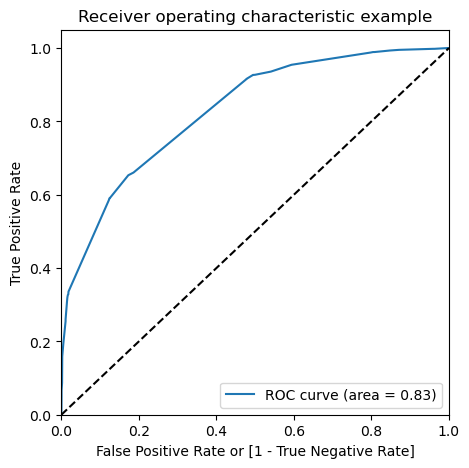

In [69]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.87 which is a very good value.

In [70]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.092772          0    1    0    0    0    0    0    0   
1          0         0.643167          1    1    1    1    1    1    1    1   
2          1         0.335000          0    1    1    1    1    0    0    0   
3          0         0.042802          0    1    0    0    0    0    0    0   
4          0         0.643167          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [71]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.385687  1.000000  0.000000
0.1   0.1  0.505276  0.987724  0.202378
0.2   0.2  0.668425  0.925640  0.506937
0.3   0.3  0.673837  0.915819  0.521911
0.4   0.4  0.765557  0.590319  0.875578
0.5   0.5  0.765828  0.590319  0.876018
0.6   0.6  0.765016  0.586110  0.877340
0.7   0.7  0.729031  0.322694  0.984144
0.8   0.8  0.728084  0.319537  0.984585
0.9   0.9  0.685606  0.192564  0.995155

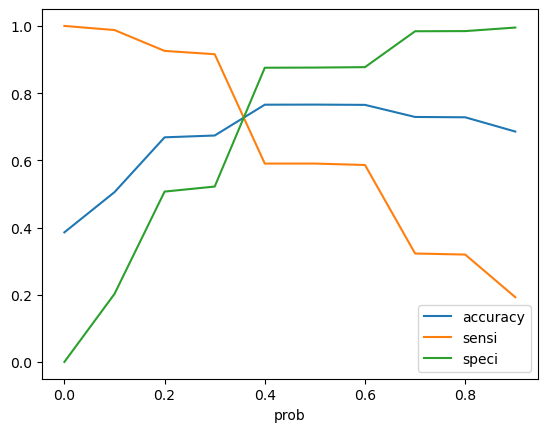

In [72]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

 From the graph it is visible that the optimal cut off is at 0.34.

In [73]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.092772          0    1    0    0    0    0    0    0   
1          0         0.643167          1    1    1    1    1    1    1    1   
2          1         0.335000          0    1    1    1    1    0    0    0   
3          0         0.042802          0    1    0    0    0    0    0    0   
4          0         0.643167          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                1  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                1

In [74]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7547348484848485

In [75]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3696,  845],
       [ 968, 1883]], dtype=int64)

In [76]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [77]:
# Calculating the sensitivity
TP/(TP+FN)

0.6604700105226237

In [78]:
# Calculating the specificity
TN/(TN+FP)

0.8139176392865007

# Prediction on Test set

In [79]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3978,  563],
       [1168, 1683]], dtype=int64)

In [80]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7493321460373998

In [81]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5903191862504384

Precision and recall tradeoff

In [82]:
from sklearn.metrics import precision_recall_curve

In [83]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 7387    0
 7388    1
 7389    1
 7390    0
 7391    1
 Name: Converted, Length: 7392, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 7387    0
 7388    1
 7389    0
 7390    1
 7391    0
 Name: Predicted, Length: 7392, dtype: int64)

In [84]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

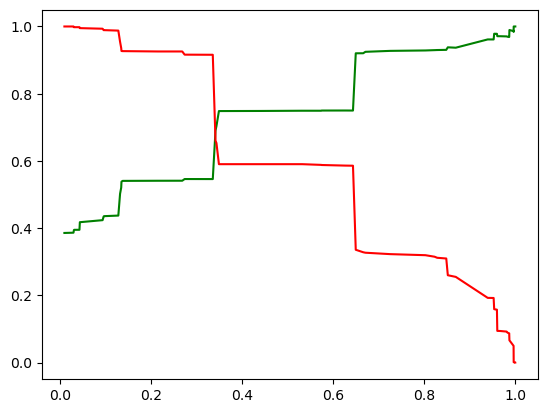

In [85]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [86]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.092772          0    1    0    0    0    0    0    0   
1          0         0.643167          1    1    1    1    1    1    1    1   
2          1         0.335000          0    1    1    1    1    0    0    0   
3          0         0.042802          0    1    0    0    0    0    0    0   
4          0         0.643167          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                1  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                1

In [87]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7655573593073594

In [88]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3976,  565],
       [1168, 1683]], dtype=int64)

In [89]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [90]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7486654804270463

In [91]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.5903191862504384

In [98]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

const  Lead Origin_lead add form  Lead Source_nc_edm  \
4608    1.0                      False               False   
7935    1.0                      False               False   
4043    1.0                      False               False   
7821    1.0                      False               False   
856     1.0                      False               False   
...     ...                        ...                 ...   
7387    1.0                      False               False   
3063    1.0                      False               False   
603     1.0                      False               False   
4210    1.0                      False               False   
7352    1.0                      False               False   

      Lead Source_welingak website  Do Not Email_yes  \
4608                         False             False   
7935                         False              True   
4043                         False              True   
7821                         False             False   
856                          False             False   
...                            ...               ...   
7387                         False             False   
3063                         False             False   
603                          False             False   
4210                         False             False   
7352                         False             False   

      Last Activity_converted to lead  Last Activity_email marked spam  \
4608                            False                            False   
7935                            False                            False   
4043                            False                            False   
7821                            False                            False   
856                             False                            False   
...                               ...                              ...   
7387                            False                            False   
3063                            False                            False   
603                             False                            False   
4210                            False                            False   
7352                            False                            False   

      Last Activity_olark chat conversation  Last Activity_sms sent  \
4608                                  False                   False   
7935                                  False                   False   
4043                                  False                   False   
7821                                  False                   False   
856                                   False                   False   
...                                     ...                     ...   
7387                                  False                   False   
3063                                  False                   False   
603                                   False                   False   
4210                                  False                   False   
7352                                  False                   False   

      What is your current occupation_not provided  \
4608                                         False   
7935                                          True   
4043                                         False   
7821                                         False   
856                                           True   
...                                            ...   
7387                                         False   
3063                                          True   
603                                          False   
4210                                         False   
7352                                         False   

      What is your current occupation_student  \
4608                                    False   
7935                                    False   
4043                                     True   
7

In [126]:
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Conversion_Prob  Conversion_Prob
0                1                1
1                0                1
2                1                0
3                0                1
4                0                1

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=14)  # Adjust k based on the number of features you want to select
X_train_sm = selector.fit_transform(X_train_scaled, y_train)
X_test_sm = selector.transform(X_test_scaled)

# Define the function to convert data to numeric
def convert_to_numeric(data):
    if isinstance(data, pd.DataFrame):
        return data.apply(pd.to_numeric, errors='coerce')
    elif isinstance(data, pd.Series):
        return pd.to_numeric(data, errors='coerce')
    else:
        try:
            return np.array(data, dtype=np.float64)
        except ValueError:
            return np.array(data, dtype=object)  # Convert to object type to handle mixed types

# Convert X_test_sm to numeric
X_test_sm_numeric = convert_to_numeric(X_test_sm)

# Check for NaN or infinite values after conversion
nan_or_inf = False
if isinstance(X_test_sm_numeric, pd.DataFrame):
    for col in X_test_sm_numeric.columns:
        if X_test_sm_numeric[col].isnull().any() or np.isinf(X_test_sm_numeric[col]).any():
            nan_or_inf = True
            print(f"Column {col} contains NaN or infinite values.")
else:
    if np.any(np.isnan(X_test_sm_numeric)) or np.any(np.isinf(X_test_sm_numeric)):
        nan_or_inf = True
        print("There are NaN or infinite values in X_test_sm_numeric.")

if nan_or_inf:
    print("Please handle NaN or infinite values before prediction.")
else:
    # Train the model (example using LogisticRegression)
    res = LogisticRegression()
    res.fit(X_train_sm, y_train)
    
    # Predict probabilities
    y_test_pred_prob = res.predict_proba(X_test_sm_numeric)[:, 1]  # Probability of class 1
    
    # Create the output DataFrame
    y_pred_final = pd.DataFrame({
        'Converted': y_test,
        'Conversion_Prob': y_test_pred_prob
    })
    
    # Making prediction using cut off 0.41
    y_pred_final['final_predicted'] = y_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.41 else 0)
    
    print(y_pred_final.head())

   Converted  Conversion_Prob  final_predicted
0          1         0.900069                1
1          0         0.871509                1
2          1         0.219476                0
3          0         0.973817                1
4          0         0.657213                1


In [172]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.45

In [173]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[5, 9],
       [2, 4]], dtype=int64)

In [174]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [175]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.3076923076923077

In [176]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6666666666666666

# Conclusion


It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1.The total time spend on the Website.

2.Total number of visits.

3.When the lead source was:

a. Google

b. Direct traffic

c. Organic search

d. Welingak website

4.When the last activity was:

a. SMS

b. Olark chat conversation

5.When the lead origin is Lead add format.

6.When their current occupation is as a working professional.Keeping these in mind the X Education can flourish as they have a     very high chance to get almost all the potential buyers to change their mind and buy their courses.